In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:

engine = create_engine("sqlite:///hawaii.sqlite", echo=False)
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [8]:
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [9]:
Measurements = Base.classes.measurement
Stations = Base.classes.station
Measurements

sqlalchemy.ext.automap.measurement

In [10]:
# We can view all of the classes that automap found
session = Session(engine)
inspector = inspect(engine)

columns_measurement= inspector.get_columns('measurement')
for column in columns_measurement:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns_station= inspector.get_columns('station')
for column in columns_station:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Save references to each table


In [13]:
# Create our session (link) from Python to the DB
Measurements_query = session.query(Measurements)
Stations_query = session.query(Stations)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > '2016-08-01').all()



[('2016-08-02', 0.05),
 ('2016-08-03', 0.0),
 ('2016-08-04', 0.04),
 ('2016-08-05', 0.01),
 ('2016-08-06', 0.0),
 ('2016-08-07', 0.39),
 ('2016-08-08', 0.02),
 ('2016-08-09', 0.0),
 ('2016-08-10', 0.0),
 ('2016-08-11', 0.0),
 ('2016-08-12', 0.0),
 ('2016-08-13', 0.0),
 ('2016-08-14', 0.0),
 ('2016-08-15', 0.0),
 ('2016-08-16', 0.0),
 ('2016-08-17', 0.0),
 ('2016-08-18', 0.0),
 ('2016-08-19', 0.04),
 ('2016-08-20', 0.0),
 ('2016-08-21', 0.12),
 ('2016-08-22', 0.4),
 ('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15

In [15]:
# Calculate the date 1 year ago from the last data point in the database
import datetime as dt
last_data_point = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
last_data_point



('2017-08-23')

In [16]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [17]:
# Perform a query to retrieve the data and precipitation scores
df_m = pd.DataFrame(session.query(Measurements.station,Measurements.date,Measurements.prcp,Measurements.tobs).order_by(Measurements.date).\
                    filter(Measurements.date >= '2016-08-23').all(), columns={'Precipitation','TOBS','Station','Date'})
df_m = df_m.rename(columns={'Date':'Station', 'Precipitation':'Date', 'TOBS':'Precipitation','Station':'TOBS'})

# Save the query results as a Pandas DataFrame and set the index to the date column

df_m.head()
# Sort the dataframe by date



,Station,Precipitation,TOBS,Date
0,USC00519397,2016-08-23,0.00,81.0
1,USC00513117,2016-08-23,0.15,76.0
2,USC00514830,2016-08-23,0.05,80.0
3,USC00517948,2016-08-23,NaN,80.0
4,USC00519523,2016-08-23,0.02,80.0


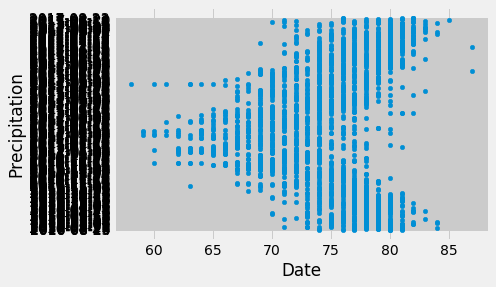

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
ax1 = df_m.plot.scatter(x='Date',y='Precipitation')

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_m['Precipitation'].describe()

count           2230
unique           366
top       2017-01-27
freq               7
Name: Precipitation, dtype: object

In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(Stations).count()

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
session.query(Measurements.station,func.count(Measurements.prcp)).group_by(Measurements.station).order_by(func.count(Measurements.prcp).desc()).all()

# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
from scipy import stats
from scipy import mean
min_temp = min(session.query(Measurements.tobs))
max_temp = max (session.query(Measurements.tobs))
temp=[]

for temperature in session.query(Measurements.tobs):
    temp.append(temperature)

mean_temp= round(mean(temp),1)

# highest temperature recorded, and average temperature of the most active station?
print(f" The minimum temperature recorded was {min_temp}")
print(f" The maximum temperature recorded was {max_temp}")
print(f" The average temperature recorded was {mean_temp}")


 The minimum temperature recorded was (53.0,)
 The maximum temperature recorded was (87.0,)
 The average temperature recorded was 73.1


<ipython-input-24-7517269c414a>:11: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  mean_temp= round(mean(temp),1)


In [71]:
stations_summary=session.query(Measurements.station,func.count(Measurements.tobs)).group_by(Measurements.station).order_by(func.count(Measurements.tobs).desc()).\
filter(Measurements.date >= '2016-08-23').all()

top_station=stations_summary[0][0]



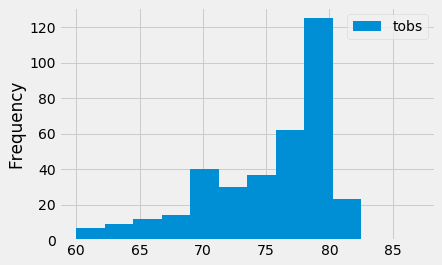

In [91]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station_data=pd.DataFrame(session.query(Measurements.station,Measurements.tobs).filter(Measurements.station == top_station).filter(Measurements.date >= '2016-08-23').all())
ax2 = top_station_data.plot.hist(bins=12)


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
